Goal : read in all light curves we have for QSO from PTF, CRTS and SDSS. Plot simply histogram of all epochs for each survey to see the span of time of observations 

## Standard imports 

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from astropy.table import Table

## Read-in PTF QSO light curves 

In [30]:
# PTF light curves were grabbed from IRSA using 01.2017_PTF_data_for_CRTS_project
# they are then analysed using PTF_A_Fig_1_QSO...

# these lines come from the analysis code 
# we read all lightcurves (may take a minute to read as the file has size of 82 MB ... )
qso_ptf = Table.read('../../CRTS_PROJECT/IPAC_output_tables/Ipac_PTF_lightcurves_QSO_S82.tbl', format='ipac')

10
159631


(array([  1.33760000e+04,   5.52200000e+03,   2.33400000e+03,
          5.95000000e+02,   4.10000000e+01,   5.83400000e+03,
          2.63740000e+04,   1.54880000e+04,   6.19400000e+03,
          1.95000000e+02,   1.44000000e+03,   4.31400000e+03,
          3.09200000e+03,   5.73200000e+03,   1.94500000e+03,
          9.00000000e+00,   8.86100000e+03,   2.87250000e+04,
          2.20700000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   6.52700000e+03,
          3.95200000e+03,   1.86000000e+02,   0.00000000e+00,
          1.17100000e+03,   5.70500000e+03,   9.81200000e+03]),
 array([ 55007.3205572 ,  55073.32359287,  55139.32662853,  55205.3296642 ,
         55271.33269987,  55337.33573553,  55403.3387712 ,  55469.34180687,
         55535.34484253,  55601.3478782 ,  55667.35091387,  55733.35394953,
         55799.3569852 ,  55865.36002087,  55931.36305653,  55997.3660922 ,
         56063.36912787,  56129.37216353,  56195.3751992 ,  56261.37823487

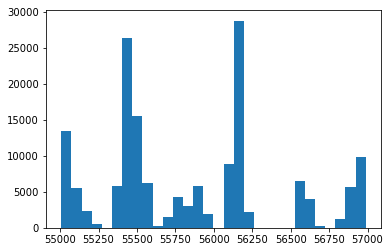

In [3]:
%matplotlib inline
m = qso_ptf['obsmjd'].data.data < 50000
print(np.sum(m))
print(np.sum(~m))
plt.hist(qso_ptf['obsmjd'][~m], bins=30)

In [31]:
qso_ptf

cntr_01,dist_x,pang_x,ra_01,dec_01,obsmjd,mag_autocorr,magerr_auto,oid,ra,dec,fid,transient_flag,astrometricrms,nobs,ngoodobs,nbestobs,referencemag,referencemagerr,medianmag,bestmedianmag,meanmag,bestmeanmag,magrms,bestmagrms,sid,s_ra,s_dec,ptffield,ccdid,hmjd,nid,mag_auto,limitmag,absphotzp,fwhmsex,fwhm_image,qaflags,flags,photcalflag,goodflag
,arcsec,deg,degrees,degrees,days,mag,mag,,degrees,degrees,,,degrees,,,,mag,mag,mag,mag,mag,mag,mag,mag,,degrees,degrees,,,days,,mag,mag,mag,arcsec,pixels,,,"0=No, 1=Yes","0=No, 1=Yes"
int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,int64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,int64,float64,int64,float64,float64,float64,float64,float64,int64,int64,int64,int64
1,0.0,0.0,6.968328,0.437734,56903.3404372,18.747,0.04,26991060002225,6.968328,0.437734,1,0,4.777896e-07,125,125,123,18.717,0.006,18.746,18.748,18.743,18.743,0.06,0.06,21305664001544,6.968329,0.437729,2699,6,56903.3455472,1968,18.76,21.93,27.896,2.45,2.713,0,131072,0,1
1,0.0,0.0,6.968328,0.437734,56903.3701872,18.739,0.04,26991060002225,6.968328,0.437734,1,0,4.777896e-07,125,125,123,18.717,0.006,18.746,18.748,18.743,18.743,0.06,0.06,21305689001545,6.968338,0.43773,2699,6,56903.3752972,1968,18.749,21.982,27.901,2.35,2.558,0,131072,0,1
1,0.0,0.0,6.968328,0.437734,56904.3353572,18.766,0.047,26991060002225,6.968328,0.437734,1,0,4.777896e-07,125,125,123,18.717,0.006,18.746,18.748,18.743,18.743,0.06,0.06,21299870001227,6.968337,0.43772,2699,6,56904.3405072,1969,18.784,21.467,27.896,2.45,2.968,0,131072,0,1
1,0.0,0.0,6.968328,0.437734,56904.3635872,18.721,0.043,26991060002225,6.968328,0.437734,1,0,4.777896e-07,125,125,123,18.717,0.006,18.746,18.748,18.743,18.743,0.06,0.06,21299891001474,6.96832,0.437738,2699,6,56904.3687372,1969,18.728,21.97,27.901,2.45,2.778,0,131072,0,1
1,0.0,0.0,6.968328,0.437734,56951.2452872,18.741,0.052,26991060002225,6.968328,0.437734,1,0,4.777896e-07,125,125,123,18.717,0.006,18.746,18.748,18.743,18.743,0.06,0.06,21903907001390,6.968324,0.43772,2699,6,56951.2507372,2013,18.736,21.813,27.82,2.35,2.646,0,131072,0,1
1,0.0,0.0,6.968328,0.437734,56951.2733472,18.785,0.053,26991060002225,6.968328,0.437734,1,0,4.777896e-07,125,125,123,18.717,0.006,18.746,18.748,18.743,18.743,0.06,0.06,21903932001362,6.968328,0.437736,2699,6,56951.2787872,2013,18.777,21.789,27.821,2.45,2.796,0,131072,0,1
1,0.0,0.0,6.968328,0.437734,56946.2431172,18.73,0.044,26991060002225,6.968328,0.437734,1,0,4.777896e-07,125,125,123,18.717,0.006,18.746,18.748,18.743,18.743,0.06,0.06,21824771001223,6.968352,0.437753,2699,6,56946.2487072,2008,18.746,21.592,27.845,2.55,3.13,0,131072,0,1
1,0.0,0.0,6.968328,0.437734,56956.2378572,18.662,0.276,26991060002225,6.968328,0.437734,1,0,4.777896e-07,125,125,123,18.717,0.006,18.746,18.748,18.743,18.743,0.06,0.06,21999993001204,6.968332,0.437743,2699,6,56956.2431172,2018,18.083,21.036,27.25,2.55,2.86,0,131072,0,1


In [4]:
# extract only the mjds ...
mjd_ptf = qso_ptf['obsmjd'].data.data


## Read-in CRTS QSO light curves

In [5]:
# code mainly from  A_Fig_1_QSO... 
dir_in = '../../CRTS_PROJECT/raw_LC_CRTS/QSO_CRTS/'
QSO_arr = np.array(os.listdir(dir_in))
print('We have %d CRTS qso files to start with ' % len(QSO_arr))

#ignore the two files that are not lightcurves

a = np.array([len(entry) for entry in QSO_arr])
QSO_list = list(QSO_arr)
QSO_list.remove('message.txt')
QSO_list.remove('file.list')

# remove empty files 
c = 0 
empty_files = []
for obj in QSO_list:
    address = dir_in + obj
    f = open(address, 'r')
    if f.readline() == '' :
        c += 1
        empty_files.append(obj)
        
print('We have %d empty files' % c)    

We have 7933 CRTS qso files to start with 
We have 179 empty files


In [6]:
QSO_nonempty = np.array(QSO_list)[~np.in1d(QSO_list, empty_files)]  
len(QSO_nonempty)

files = QSO_nonempty

In [7]:
# load all CRTS light curves into a structure ...
mjds = np.zeros_like(files, dtype=object)
for i in range(len(files)): # len(files) 
    data = Table.read(dir_in + files[i], format='ascii')
    mjds[i] = data['col1'].data


In [8]:
mjd_crts = np.concatenate(mjds)

(array([ 195894.,  183036.,  127966.,  115035.,  179486.,  192399.,
         174759.,  143634.,  155275.,  140892.]),
 array([ 53481.47285 ,  53789.875179,  54098.277508,  54406.679837,
         54715.082166,  55023.484495,  55331.886824,  55640.289153,
         55948.691482,  56257.093811,  56565.49614 ]),
 <a list of 10 Patch objects>)

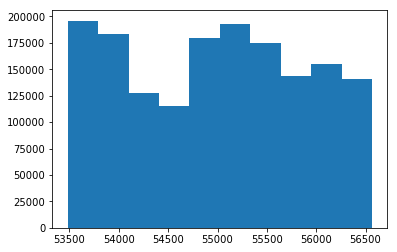

In [10]:
plt.hist(mjd_crts)

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 53642.77065,  53642.87065,  53642.97065,  53643.07065,
         53643.17065,  53643.27065,  53643.37065,  53643.47065,
         53643.57065,  53643.67065,  53643.77065]),
 <a list of 10 Patch objects>)

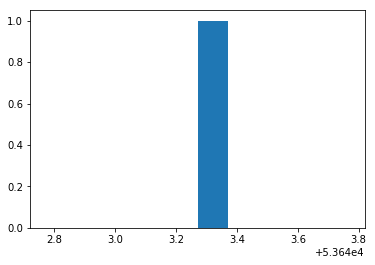

In [38]:
plt.hist(data[data>40000])

### Read-in only SDSS QSO light curves .... 

In [4]:
# from http://www.astro.washington.edu/users/ivezic/macleod/qso_dr7/Southern.html

DirIn = '../../CRTS_PROJECT/raw_LC_SDSS/QSO_S82/'
sdss_qso = os.listdir(DirIn)

In [5]:
# each SDSS qso light curve has near-simultaneous observations in 5 bands
# u,g,r,i,z  : 
# explained in detail here  - 
# http://www.astro.washington.edu/users/ivezic/macleod/qso_dr7/Southern_format_LC.html 

u_mjds = np.zeros(0) # [] # np.zeros_like(sdss_qso, dtype='object')

for i in range(len(sdss_qso)):   #  
    sdss_qso_id = sdss_qso[i]    
    data= Table.read(DirIn+sdss_qso_id, format='ascii')
    # NOTE : The ugriz magnitudes are not corrected for Galactic absorption. 
    # Bad observationsare printed as '-99.99'.
    # But all that doesn't matter for printing mjds.... 
    u_mjd = data['col1'].data
    u_mjds = np.append(u_mjds, u_mjd) # .append(u_mjd)
    if np.sum(u_mjd < 10000) > 0 : # weird mjds... 
        print(sdss_qso_id)
        
# note  : quasars were observed at slightly different times (off by few minutes)
# since time was required to change filter ... 
# But approximate mjd distribution is the same for each filter, 
# so choosing u-band to represent SDSS does  not introduce 
# any bias .... 

1475888
1088546


KeyboardInterrupt: 

In [13]:
# Aside : 

# Figure out what's wrong with these four qso that their col1 contains 
# weird values for the mjd .. 

weird_qso_id = [1072282,1088546,1365809,1475888]
data= Table.read(DirIn+str(weird_qso_id[0]), format='ascii')

# it's just there ... no time to deliberate on these few 
# outstanding measurements at 'weird' mjds
# only 4 measurements out of 573218 epochs in u-band
# are suspicious  
# One measurement per each of these quasars ... 


In [14]:
mjd_sdss_u = u_mjds

In [97]:
len(sdss_qso)

9258

## Read-in PS1 data for DR7 QSO

"The zipped file is 83MB  and the unzipped tar is 392MB.   This contains all Schneider et al. DR7 quasars, not just Stripe 82.  The files list MJD, mag, error, and filter, adopting PSF magnitudes.  The files are named after the SDSSJID, which is listed in the Schneider et al (2010) catalog." - from Chelsea's email July 18, 2017

Thus I  need to select by ra, dec only those that are in S82 .... 

In [6]:
# First, read-in filenames, and select by ra,dec those that are in S82 footprint....
# ( another way would be to select by ra,dec and match 
# positionally to my S82 SDSS QSO list..)

import os
ps1_qso_schneider = os.listdir('../raw_data/PS1_Schneider/')

In [7]:
#ps1_qso_schneider[0][9:]

In [8]:
from astropy.coordinates import SkyCoord
from astropy import units as u

ra_ps1 = np.array([coord[:9] for coord in ps1_qso_schneider])
dec_ps1 = np.array([coord[9:] for coord in ps1_qso_schneider])

# make into AstroPy - digestible format.. 
ra_ps1_split = [ra[:2] + ' '+ ra[2:4] + ' '+ra[4:] for ra in ra_ps1]
dec_ps1_split = [dec[:3]+ ' '+ dec[3:5]+ ' ' + dec[5:] for dec in dec_ps1]

# combining the two.. 
radec_ps1_split = np.zeros_like(ra_ps1_split, dtype='U32')
for i in range(len(ra_ps1_split)):
    radec_ps1_split[i] = ra_ps1_split[i] + ' ' + dec_ps1_split[i]

c = SkyCoord(radec_ps1_split, frame='icrs', unit=(u.hourangle, u.deg)) 

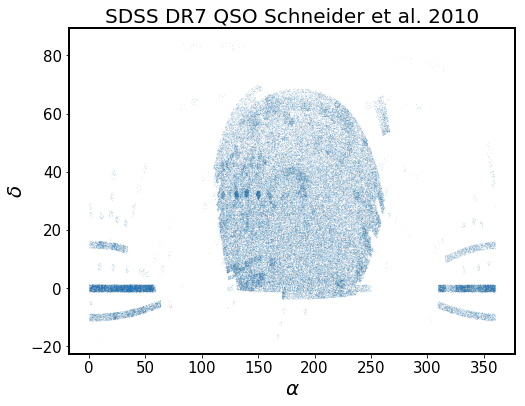

In [9]:
import matplotlib.pyplot as plt
from matplotlib import rcParams      
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 20

%matplotlib inline
# So we have a lot of PS1 quasars .... everywhere along the SDSS footprint...
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(c.ra, c.dec, s=0.001)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\delta$')
ax.set_title('SDSS DR7 QSO Schneider et al. 2010')
plt.savefig('../data_products/SDSS_DR7_Schneider_QSO.png')

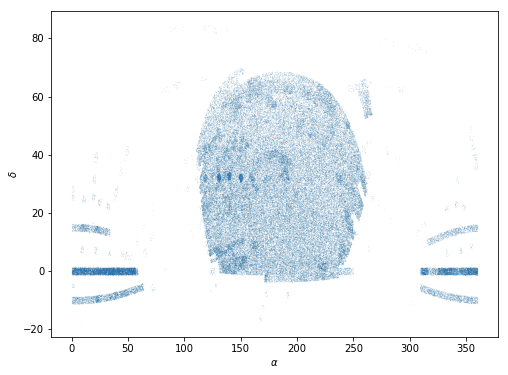

In [9]:
# Search for those that are matches to SDSS S82 QSO  :
File = '../../CRTS_PROJECT/catalogs_SDSS/DB_QSO_S82.dat'
colnames = ['dbID', 'ra', 'dec', 'SDR5ID', 'M_i', 'M_i_corr', 'redshift',
                   'mass_BH', 'Lbol', 'u', 'g', 'r', 'i', 'z', 'Au']

# 9258 QSO ....
SDSS_DB_QSO= Table.read(File, format='ascii', names = colnames)
catalog = SkyCoord(ra=SDSS_DB_QSO['ra']*u.degree, dec=SDSS_DB_QSO['dec']*u.degree)

len(catalog)

9258

In [104]:
#sdss_qso

In [105]:
#SDSS_DB_QSO

In [10]:
# Match Schneider PS1 to SDSS S82 DR7 : 
# better : match SDSS to PS1,  
# because there is less 
idx, sep2d, dist3d = catalog.match_to_catalog_sky(c) 

In [11]:
matches = c[idx]
ps1_s82_qso = np.array(ps1_qso_schneider)[idx]

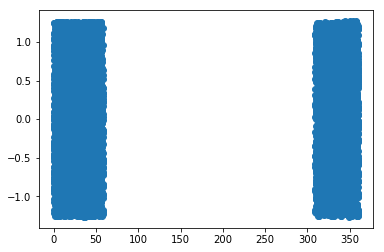

In [120]:
# Plot their ra,dec to show that they are indeed in S82 : 

plt.scatter(matches.ra , matches.dec)

In [133]:
# Read in the matched PS1 QSO , but first save this list somewhere ...
np.savetxt(  '../raw_data/ps1_qso_in_s82.txt',ps1_s82_qso, fmt='%s')

In [26]:
# Instead of matching again, read in the list 
# of PS1 QSO from Schneider et al.  which are 
# in the S82 footprint 

ps1_in_s82 = np.genfromtxt('../raw_data/ps1_qso_in_s82.txt', dtype=str)

In [27]:
ps1_in_s82[0]

'000840.63+011419.1'

In [32]:
# Now read in only those QSO from PTF that are in S82 footprint...
# take the first one for example... 
a = Table.read('../raw_data/PS1_Schneider/'+ps1_in_s82[3] , format='ascii')
np.unique(a['filter'])

g
i
r
y
z


g
i
r
y
z


In [ ]:
# has weird missing values, don't know what 
# to do atm ...  : 
# 000016.43-001833.3


InconsistentTableError: 
ERROR: Unable to guess table format with the guesses listed below:
Reader:Ecsv fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] strict_names: True
Reader:FixedWidthTwoLine fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] strict_names: True
Reader:FastBasic fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] strict_names: True
Reader:Basic fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] strict_names: True
Reader:Rdb fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] strict_names: True
Reader:FastTab fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] strict_names: True
Reader:Tab fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] strict_names: True
Reader:Cds fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] strict_names: True
Reader:Daophot fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] strict_names: True
Reader:SExtractor fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] strict_names: True
Reader:Ipac fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] strict_names: True
Reader:Latex fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] strict_names: True
Reader:AASTex fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] strict_names: True
Reader:FastCommentedHeader delimiter: '|' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: '|' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: ',' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: ',' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: ' ' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: ' ' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: '\\s' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: '\\s' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: '|' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: '|' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: ',' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: ',' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: ' ' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: ' ' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: '\\s' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: '\\s' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: '|' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: '|' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: ',' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: ',' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: ' ' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: ' ' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: '\\s' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: '\\s' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:Basic delimiter: '|' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:Basic delimiter: '|' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:Basic delimiter: ',' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:Basic delimiter: ',' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:Basic delimiter: ' ' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:Basic delimiter: ' ' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:Basic delimiter: '\\s' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:Basic delimiter: '\\s' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: '|' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: '|' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: ',' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: ',' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: ' ' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: ' ' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: '\\s' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: '\\s' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: '|' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: '|' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: ',' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: ',' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: ' ' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: ' ' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: '\\s' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: '\\s' fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4'] quotechar: "'" strict_names: True
Reader:Basic fill_values: [('', '0')] names: ['col1', 'col2', 'col3', 'col4']

************************************************************************
** ERROR: Unable to guess table format with the guesses listed above. **
**                                                                    **
** To figure out why the table did not read, use guess=False and      **
** appropriate arguments to read().  In particular specify the format **
** and any known attributes like the delimiter.                       **
************************************************************************

Wow, it really seems that I will have to read in each file line by line, 
and then split them , and then select those that are in each filter...
What a pain! 

In [22]:
ps1_in_s82[0].data[0]

AttributeError: 'Table' object has no attribute 'data'

In [29]:
content

['# MJD mag mag_err filter',
 '55088.485         20.410053      0.0397112  r',
 '55088.496         20.154891      0.0383685  r',
 '55094.511         20.030847      0.0477702  r',
 '55094.522         19.963620      0.0448612  r',
 '55098.512         20.102069      0.0425892  r',
 '55098.522         20.200241      0.0459264  r',
 '55102.464         20.093867      0.0406517  r',
 '55102.474         20.006544      0.0482839  r',
 '55104.428         20.078253      0.0507471  r',
 '55104.438         19.966895      0.0481868  r',
 '55399.611         19.510739       0.145124  y',
 '55399.620         19.773376       0.190891  y',
 '55423.741         20.043645      0.0101306  r',
 '55449.536         20.267187       0.134449  g',
 '55452.459         19.966655      0.0453059  i',
 '55452.470         19.851321      0.0442256  i',
 '55452.483         19.970860      0.0385482  r',
 '55452.495         20.255604      0.0477750  r',
 '55478.308         19.982993      0.0357315  r',
 '55478.319         1

In [23]:
qso_id = ps1_in_s82[0].data[0]
fname = '../raw_data/PS1_Schneider/'+qso_id
with open(fname) as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 

        Use :attr:`Row.as_void` instead. [__main__]


In [24]:
cont = [x.split() for x in content ]

In [25]:
good = [x for x in cont if len(x)>3]

In [26]:
good[0].remove('#')

In [27]:
r_mjd = [x[0] for x in good if x[-1] is 'r']

In [28]:
np.array(r_mjd).astype(float)

array([ 55088.485,  55088.496,  55094.511,  55094.522,  55098.512,
        55098.522,  55102.464,  55102.474,  55104.428,  55104.438,
        55423.741,  55452.483,  55452.495,  55478.308,  55478.319,
        55796.531,  55796.541,  56205.371,  56205.382,  56586.295,
        56586.305])

In [200]:
r_mjds = np.zeros(0)
for i in range(len(ps1_s82_qso)):   #  
    
    qso_id = ps1_s82_qso[i]    
    
    fname = '../raw_data/PS1_Schneider/'+qso_id
    with open(fname) as f:
        content = f.readlines()
    # remove whitespace 
    content = [x.strip() for x in content] 
    # split each line into columns 
    cont = [x.split() for x in content ]
    # select only lines that actually have filter info
    good = [x for x in cont if len(x)>3]
    # remove the header marker
    good[0].remove('#')
    # select only those mjds  where filter is 'r'
    r_mjd_list= [x[0] for x in good if x[-1] is 'r']
    # make an array ... 
    r_mjd = np.array(r_mjd_list).astype(float)
    
    r_mjds = np.append(r_mjds, r_mjd)
    

In [203]:
mjd_ps1 = r_mjds

### Compare PS1, PTF , CRTS, SDSS epochs 

In [205]:
print('There are %d PTF epochs '%len(mjd_ptf))
print('There are %d CRTS epochs '%len(mjd_crts))
print('There are %d SDSS u-band epochs '%len(mjd_sdss_u))
print('There are %d PS1 r-band epochs' % len(mjd_ps1))

There are 159641 PTF epochs 
There are 1608376 CRTS epochs 
There are 573218 SDSS u-band epochs 
There are 131560 PS1 r-band epochs


In [208]:
#plt.hist(mjd_ps1)

In [206]:
# Generic plot settings...
import matplotlib.pyplot as plt
from matplotlib import rcParams      
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 20

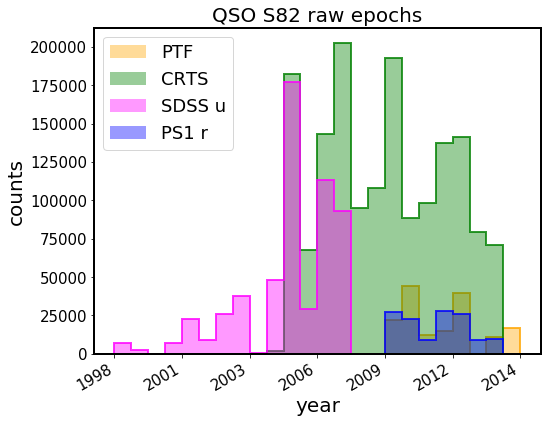

In [211]:
from astropy.time import Time

%matplotlib inline

fig,ax = plt.subplots(1,1,figsize=(8,6))

lw = 2 
nbins = 10
# PTF 
bins = np.linspace(51000, 57000, 25)
for sample, label,color in  zip([mjd_ptf[mjd_ptf>1000], mjd_crts,  
                                 mjd_sdss_u[mjd_sdss_u>1000], mjd_ps1],
                         ['PTF', 'CRTS', 'SDSS u', 'PS1 r'], 
                         ['orange', 'green', 'magenta', 'blue']):
    #hist, bin_edges = np.histogram(sample, bins=nbins, density=False)
    #bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    #hist[0] = 0 ; hist[-1] = 0 
    #ax.plot(bin_centres, hist, ls='steps',  label=label, lw=lw, alpha=0.9)
    ax.hist(sample, histtype='stepfilled',lw=lw, bins = bins, 
            alpha=0.4, label=label, color=color)
    ax.hist(sample, histtype='step',lw=lw, bins = bins, 
            alpha=0.8, color=color)
ax.legend(fontsize=18, loc='upper left')
from astropy.time import Time

ax.set_ylabel('counts')
ax.set_xlabel('year')
ax.set_title('QSO S82 raw epochs')
#ax.get_xaxis().set_visible(False)
a=ax.get_xticks().tolist()
t = Time(a , format='mjd')
#a[1] = 'Testing'
year = [d.datetime.year for d in t]
ax.set_xticklabels(year)
plt.setp(plt.xticks()[1], rotation=30, ha='right')
# removing whatever was visible before 
#ax.get_xaxis().set_ticks([])
#ax

plt.savefig('epochs_S82_QSO_compare.png', bbox_inches='tight')

In [234]:
t.datetime[0].year

1995

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

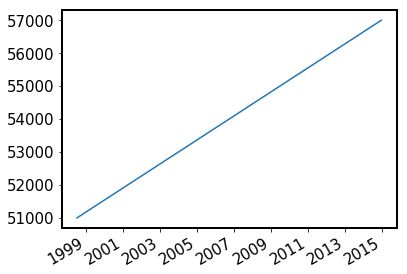

In [219]:
mjd = np.array([51000,52000,53000,54000, 55000,56000,57000])
t = Time(mjd, format='mjd')
plt.plot(t.datetime , mjd)
plt.setp(plt.xticks()[1], rotation=30, ha='right')

In [ ]:
# to make nice datetime x-axis labels, 
# need to first turn off the original x-axis labels, 
# take their values, 
# convert to datetime, 
# and set as x-axis labels the new datetime ones 

In [202]:
from astropy.time import Time
xticklabels = ax.get_xticks()
t = Time(xticklabels, format='mjd')
t.datetime

array([datetime.datetime(1995, 10, 10, 0, 0),
       datetime.datetime(1998, 7, 6, 0, 0),
       datetime.datetime(2001, 4, 1, 0, 0),
       datetime.datetime(2003, 12, 27, 0, 0),
       datetime.datetime(2006, 9, 22, 0, 0),
       datetime.datetime(2009, 6, 18, 0, 0),
       datetime.datetime(2012, 3, 14, 0, 0),
       datetime.datetime(2014, 12, 9, 0, 0),
       datetime.datetime(2017, 9, 4, 0, 0)], dtype=object)

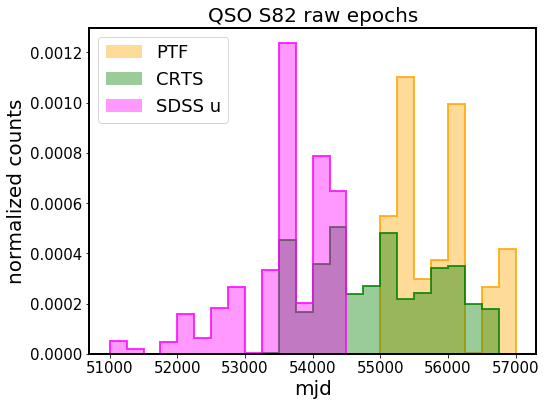

In [179]:
# the same but normalized counts... 
%matplotlib inline

fig,ax = plt.subplots(1,1,figsize=(8,6))

lw = 2 
nbins = 10
# PTF 
bins = np.linspace(51000, 57000, 25)
for sample, label,color in  zip([mjd_ptf[mjd_ptf>1000], mjd_crts,  mjd_sdss_u[mjd_sdss_u>1000]],
                         ['PTF', 'CRTS', 'SDSS u'], ['orange', 'green', 'magenta']):
    #hist, bin_edges = np.histogram(sample, bins=nbins, density=False)
    #bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    #hist[0] = 0 ; hist[-1] = 0 
    #ax.plot(bin_centres, hist, ls='steps',  label=label, lw=lw, alpha=0.9)
    ax.hist(sample, histtype='stepfilled',lw=lw, bins = bins, alpha=0.4, 
            label=label, color=color, normed=True)
    ax.hist(sample, histtype='step',lw=lw, bins = bins, alpha=0.8, color=color, normed=True)
ax.legend(fontsize=18, loc='upper left')
ax.set_ylabel('normalized counts')
ax.set_xlabel('mjd')
ax.set_title('QSO S82 raw epochs')
plt.savefig('qso_s82_ptf_crts_sdss_mjd_compare_normed.png', bbox_inches='tight')

In [147]:
from astropy.time import Time